<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W6_11_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


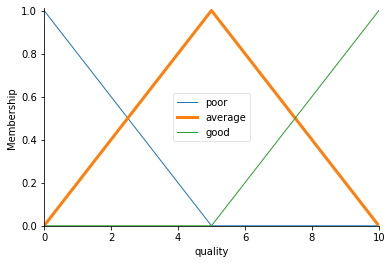

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
quality['average'].view()

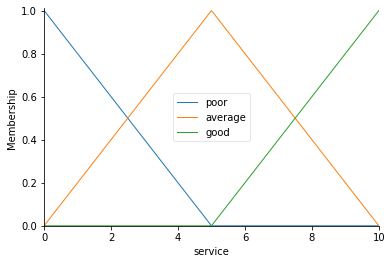

In [4]:
service.view()

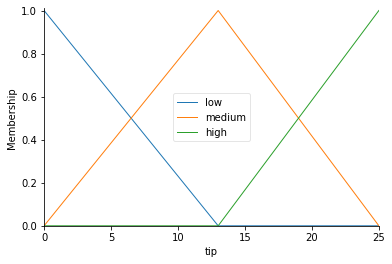

In [5]:
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

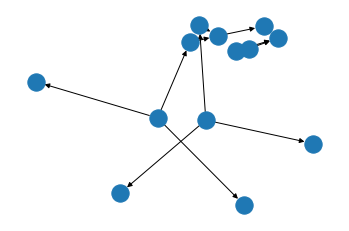

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

19.847607361963192


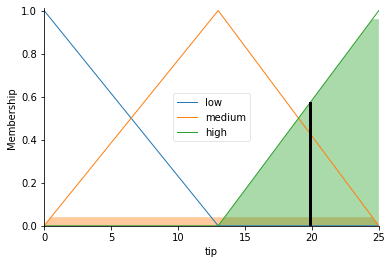

In [9]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

0.44612676056338024


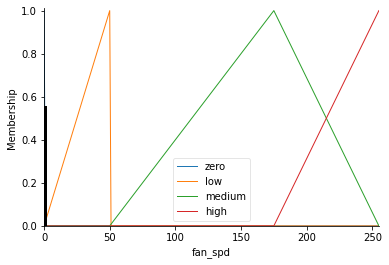

In [60]:
# EX2:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Temp = ctrl.Antecedent(np.arange(-10, 100, 1), 'Temp')
Humidity = ctrl.Antecedent(np.arange(0, 98, 1), 'Humidity')
fan_spd = ctrl.Consequent(np.arange(0, 256, 1), 'fan_spd')

Temp['cold'] = fuzz.trimf(Temp.universe, [-10, -10, 0])
Temp['cool'] = fuzz.trimf(Temp.universe, [0, 0, 10])
Temp['warm'] = fuzz.trimf(Temp.universe, [10, 50, 50])
Temp['hot'] = fuzz.trimf(Temp.universe, [50, 100, 100])

Humidity['low'] = fuzz.trimf(Humidity.universe, [0, 0, 30])
Humidity['med'] = fuzz.trimf(Humidity.universe, [0, 30, 30])
Humidity['high'] = fuzz.trimf(Humidity.universe, [70, 98, 98])

fan_spd['zero'] = fuzz.trimf(fan_spd.universe, [0, 0, 1])
fan_spd['low'] = fuzz.trimf(fan_spd.universe, [0, 50, 50])
fan_spd['medium'] = fuzz.trimf(fan_spd.universe, [50, 175, 255])
fan_spd['high'] = fuzz.trimf(fan_spd.universe, [175, 255, 255])

rule1 = ctrl.Rule(Temp['cold'] & Humidity['high'], fan_spd['high'])
rule2 = ctrl.Rule(Temp['cool'] & Humidity['high'], fan_spd['medium'])
rule3 = ctrl.Rule(Temp['warm'] & Humidity['high'], fan_spd['low'])
rule4 = ctrl.Rule(Temp['hot'] & Humidity['high'], fan_spd['zero'])

rule5 = ctrl.Rule(Temp['cold'] & Humidity['med'], fan_spd['medium'])
rule6 = ctrl.Rule(Temp['cool'] & Humidity['med'], fan_spd['low'])
rule7 = ctrl.Rule(Temp['warm'] & Humidity['med'], fan_spd['zero'])
rule8 = ctrl.Rule(Temp['hot'] & Humidity['med'], fan_spd['zero'])

rule9 = ctrl.Rule(Temp['cold'] & Humidity['low'], fan_spd['medium'])
rule10 = ctrl.Rule(Temp['cool'] & Humidity['low'], fan_spd['low'])
rule11 = ctrl.Rule(Temp['warm'] & Humidity['low'], fan_spd['zero'])
rule12 = ctrl.Rule(Temp['hot'] & Humidity['low'], fan_spd['zero'])

fan_spd_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fan_spd_ctrl = ctrl.ControlSystemSimulation(fan_spd_ctrl)
fan_spd_ctrl.input['Temp'] = 19
fan_spd_ctrl.input['Humidity'] = 30
fan_spd_ctrl.compute()
print(fan_spd_ctrl.output['fan_spd'])
fan_spd.view(sim=fan_spd_ctrl)
